                                        Machine Learning with Titanic Dataset

Importing Neccessary Packages and reading the csv file and printing the head of the csv file.

In [1]:
import pandas as pd
import numpy as np
file=pd.read_csv("titanic.csv")
print(file.head())
print(file.shape)

    Class    Age    Sex  Survived
0 -1.8700 -0.228  0.521        -1
1 -0.9230 -0.228 -1.920         1
2 -0.9230 -0.228 -1.920         1
3  0.9650 -0.228  0.521         1
4  0.0214 -0.228  0.521        -1
(2201, 4)


Checking whether any column in the dataset contains NaN values.

In [2]:
print(file.isnull().values.any())

False


Computing the Basic Statistics(Descriptive) of the features in the dataset.

In [3]:
print(file.describe())

             Class          Age          Sex     Survived
count  2201.000000  2201.000000  2201.000000  2201.000000
mean     -0.000759     0.000202    -0.000249    -0.353930
std       1.000852     0.999966     1.000562     0.935484
min      -1.870000    -0.228000    -1.920000    -1.000000
25%      -0.923000    -0.228000     0.521000    -1.000000
50%       0.021400    -0.228000     0.521000    -1.000000
75%       0.965000    -0.228000     0.521000     1.000000
max       0.965000     4.380000     0.521000     1.000000


Now, Using Matplotlib library plotting the two features in the Scatter plot

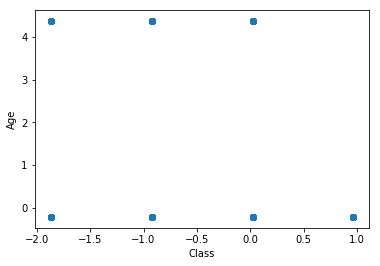

In [22]:
plt.scatter(new['Class'],new['Age'])
plt.xlabel('Class')
plt.ylabel('Age')
plt.show()

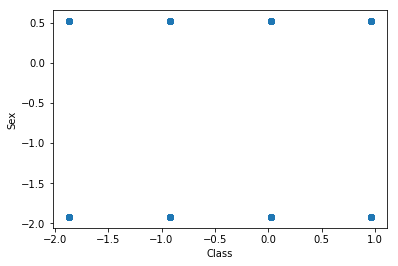

In [25]:
plt.scatter(new['Class'],new['Sex'])
plt.xlabel('Class')
plt.ylabel('Sex')
plt.show()

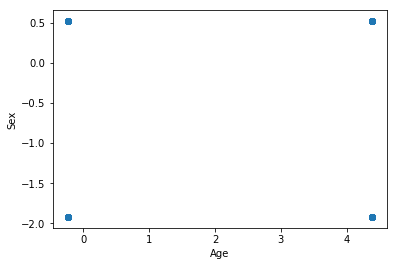

In [26]:
plt.scatter(new['Age'],new['Sex'])
plt.xlabel('Age')
plt.ylabel('Sex')
plt.show()

Now, Plotting the three features in the correlation matrix

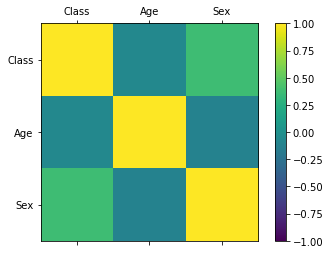

In [27]:
correlation = new.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation, vmin=-1, vmax=1)
fig.colorbar(cax)
names=["Class","Age","Sex"]
ticks = np.arange(0,3,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

Now using the sklearn library, we import train_test_test from cross validation and split the original dataset into training and test dataset(70,30).

In [31]:
from sklearn.cross_validation import train_test_split
train,test=train_test_split(file,test_size=0.3)
print(train.shape)
print(test.shape)
features_train=train[['Class','Age','Sex']]
features_test = test[['Class','Age','Sex']]
labels_train = train.Survived
labels_test = test.Survived
print(labels_test.tail())

(1540, 4)
(661, 4)
1743   -1
2066   -1
656     1
432     1
788    -1
Name: Survived, dtype: int64


Now, we can use our machine learning algorithm to play around with training and test data set. We begin with "Naive Bayes - Gaussian" classifier.

In [34]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
training = clf.fit(features_train,labels_train)
predictions = clf.predict(features_test)
print(predictions)
print("Accuracy:",clf.score(features_test,labels_test))

[-1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1 -1  1 -1  1 -1 -1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1
  1 -1 -1 -1 -1  1 -1 -1  1 -1  1 -1  1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  1 -1 -1 -1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1
  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1  1 -1 -1  1 -1 -1 -1 -1 -1
 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1 -1 -1  1 -1  1
 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1
 -1 -1  1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
 -1 -1  1 -1  1 -1 -1  1 -1  1  1 -1  1 -1 -1  1  1 -1  1 -1 -1 -1  1 -1 -1
 -1 -1 -1  1 -1  1  1 -1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1 -1  1  1 -1 -1
  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1
  1  1 -1 -1

Now, Using our second classifier as "Support Vector Machine" with kernel="rbf".

In [35]:
from sklearn import svm
clf = svm.SVC()
training = clf.fit(features_train,labels_train)
predictions = clf.predict(features_test)
print(predictions)
print("Accuracy:",clf.score(features_test,labels_test))

[-1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1 -1  1 -1  1 -1 -1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1
  1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  1 -1 -1 -1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1
  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1 -1 -1  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1 -1 -1  1 -1  1
 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1
 -1 -1  1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
 -1 -1  1 -1  1 -1 -1  1 -1  1 -1 -1  1 -1 -1  1  1 -1  1 -1 -1 -1  1 -1 -1
 -1 -1 -1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1  1  1 -1 -1
  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1
  1  1 -1 -1

"Support Vector Machine" with kernel="linear".

In [36]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
training = clf.fit(features_train,labels_train)
predictions = clf.predict(features_test)
print(predictions)
print("Accuracy:",clf.score(features_test,labels_test))

[-1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1 -1  1 -1  1 -1 -1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1
  1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  1 -1 -1 -1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1
  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1 -1 -1  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1 -1 -1  1 -1  1
 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1
 -1 -1  1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1  1  1 -1  1 -1 -1 -1  1 -1 -1
 -1 -1 -1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1  1  1 -1 -1
  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1
  1  1 -1 -1

"Support Vector Machine" with kernel="poly".

In [37]:
from sklearn import svm
clf = svm.SVC(kernel='poly')
training = clf.fit(features_train,labels_train)
predictions = clf.predict(features_test)
print(predictions)
print("Accuracy:",clf.score(features_test,labels_test))

[-1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1 -1  1 -1  1 -1 -1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1
  1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  1 -1 -1 -1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1
  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1 -1 -1  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1 -1 -1  1 -1  1
 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1
 -1 -1  1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
 -1 -1  1 -1  1 -1 -1  1 -1  1 -1 -1  1 -1 -1  1  1 -1  1 -1 -1 -1  1 -1 -1
 -1 -1 -1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1  1  1 -1 -1
  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1
  1  1 -1 -1

"Support Vector Machine" with kernel="rbf" and some other parameters.

In [43]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',C=10, gamma = 2)
training = clf.fit(features_train,labels_train)
predictions = clf.predict(features_test)
print(predictions)
print("Accuracy:",clf.score(features_test,labels_test))

[-1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1
  1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1
  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1 -1 -1 -1 -1  1 -1 -1
 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
 -1 -1  1 -1  1 -1 -1  1 -1  1 -1 -1  1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1 -1 -1
  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1
  1  1 -1 -1

"Support Vector Machine" with kernel="linear" and some other parameters.

In [45]:
from sklearn import svm
clf = svm.SVC(kernel='linear',C=100, gamma = 2)
training = clf.fit(features_train,labels_train)
predictions = clf.predict(features_test)
print(predictions)
print("Accuracy:",clf.score(features_test,labels_test))

[-1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1 -1  1 -1  1 -1 -1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1
  1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  1 -1 -1 -1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1
  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1 -1 -1  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1 -1 -1  1 -1  1
 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1
 -1 -1  1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1  1  1 -1  1 -1 -1 -1  1 -1 -1
 -1 -1 -1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1  1  1 -1 -1
  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1
  1  1 -1 -1

"Support Vector Machine" with kernel="poly" and some other parameters.

In [48]:
from sklearn import svm
clf = svm.SVC(kernel='poly',C=100, gamma = 5)
training = clf.fit(features_train,labels_train)
predictions = clf.predict(features_test)
print(predictions)
print("Accuracy:",clf.score(features_test,labels_test))

[-1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1 -1 -1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1
  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  1 -1 -1 -1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1
  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1 -1 -1  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1 -1 -1  1 -1  1
 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1
 -1 -1  1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
 -1 -1  1 -1  1 -1 -1  1 -1  1 -1 -1  1 -1 -1  1  1 -1  1 -1 -1 -1  1 -1 -1
 -1 -1 -1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1  1  1 -1 -1
  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1
  1  1 -1 -1

Now, Using our third classifier as "DecisionTreeClassifier"

In [49]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
training = clf.fit(features_train,labels_train)
predictions = clf.predict(features_test)
print(predictions)
print("Accuracy:",clf.score(features_test,labels_test))

[-1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1
  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1
  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1 -1 -1 -1 -1  1 -1 -1
 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
 -1 -1  1 -1  1 -1 -1  1 -1  1 -1 -1  1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1 -1 -1
  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1
  1  1 -1 -1

"DecisionTreeClassifier" with min_samples_split parameter.

In [55]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(min_samples_split=10)
training = clf.fit(features_train,labels_train)
predictions = clf.predict(features_test)
print(predictions)
print("Accuracy:",clf.score(features_test,labels_test))

[-1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1
  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1
  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1 -1 -1 -1 -1  1 -1 -1
 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
 -1 -1  1 -1  1 -1 -1  1 -1  1 -1 -1  1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1 -1 -1
  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1
  1  1 -1 -1

Now, Using our fourth classifier as "KNeighborsClassifier"

In [57]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
training = clf.fit(features_train,labels_train)
predictions = clf.predict(features_test)
print(predictions)
print("Accuracy:",clf.score(features_test,labels_test))

[-1 -1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1  1
 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1 -1 -1
 -1 -1 -1 -1 -1  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1 -1
  1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1 -1
  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1 -1 -1 -1 -1  1 -1 -1
 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1
 -1 -1  1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1  1  1 -1 -1  1 -1 -1  1 -1 -1  1
 -1 -1  1 -1  1 -1 -1  1 -1  1 -1 -1  1 -1 -1 -1  1 -1  1  1 -1 -1 -1  1  1
 -1 -1 -1 -1 -1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1 -1 -1
  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1  1 -1 -1 -1 -1  1 -1
  1  1 -1 -1

Now, Using our fourth classifier as "KNeighborsClassifier" with n_neighbors parameter

In [63]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=10)
training = clf.fit(features_train,labels_train)
predictions = clf.predict(features_test)
print(predictions)
print("Accuracy:",clf.score(features_test,labels_test))

[-1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1
  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1
  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1 -1 -1 -1 -1  1 -1 -1
 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
 -1 -1  1 -1  1 -1 -1  1 -1  1 -1 -1  1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1 -1 -1
  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1
  1  1 -1 -1

"AdaBoostClassifier"

In [64]:
from sklearn.ensemble import AdaBoostClassifier
clf=AdaBoostClassifier()
training = clf.fit(features_train,labels_train)
predictions = clf.predict(features_test)
print(predictions)
print("Accuracy:",clf.score(features_test,labels_test))

[-1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1 -1  1 -1  1 -1 -1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1
  1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  1 -1 -1 -1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1
  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1 -1 -1  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1 -1 -1  1 -1  1
 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1
 -1 -1  1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
 -1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1  1  1 -1  1 -1 -1 -1  1 -1 -1
 -1 -1 -1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1  1  1 -1 -1
  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1
  1  1 -1 -1

"AdaBoostClassifier" along with DecisionTreeClassifier.

In [66]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
clf=AdaBoostClassifier(DecisionTreeClassifier())
training = clf.fit(features_train,labels_train)
predictions = clf.predict(features_test)
print(predictions)
print("Accuracy:",clf.score(features_test,labels_test))

[-1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1
  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1
  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1 -1 -1 -1 -1  1 -1 -1
 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
 -1 -1  1 -1  1 -1 -1  1 -1  1 -1 -1  1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1 -1 -1
  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1
  1  1 -1 -1

"GradientBoostingClassifier"

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
boosted = clf.fit(features_train,labels_train)
prediction = clf.score(features_test,labels_test)
print("Accuracy:",prediction)

Accuracy: 0.797276853253


"BaggingClassifier"

In [74]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(n_estimators=10, random_state=3)
boosted = clf.fit(features_train,labels_train)
prediction = clf.score(features_test,labels_test)
print("Accuracy:",prediction)

Accuracy: 0.801815431165


"RandomForestClassifier"

In [77]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, random_state=4)
boosted = clf.fit(features_train,labels_train)
prediction = clf.score(features_test,labels_test)
print("Accuracy:",prediction)

Accuracy: 0.801815431165
